## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
import re

## Read Data

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/Shaah-i/Datssets/main/instagram_reach.csv')
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


## Data Validation and pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [4]:
df.describe(include='all')

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
count,100.000000,100.000000,100,94,100.00000,100,100,100.00000
unique,NaN,NaN,95,94,NaN,98,11,NaN
top,NaN,NaN,mikequindazzi,Who are #DataScientist and what do they do? >>...,NaN,#DeepLearning #MachineLearning#ArtificialIntel...,2 hours,NaN
freq,NaN,NaN,4,1,NaN,2,57,NaN
mean,8.940000,16.240000,NaN,NaN,961.96000,NaN,NaN,46.48000
std,6.639064,7.384286,NaN,NaN,1014.62567,NaN,NaN,55.08698
min,0.000000,1.000000,NaN,NaN,11.00000,NaN,NaN,8.00000
25%,4.000000,10.750000,NaN,NaN,252.75000,NaN,NaN,19.00000
50%,8.000000,16.500000,NaN,NaN,612.00000,NaN,NaN,29.00000
75%,12.250000,22.250000,NaN,NaN,1197.00000,NaN,NaN,46.00000


In [5]:
# checking null values

df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [6]:
# checking duplicates
df.duplicated().sum()

0

In [7]:
# dropping null values and rechecking
df.dropna(inplace=True)
df.isnull().sum()


Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [9]:
df.drop("Unnamed: 0", axis= 1, inplace= True)
df

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...
95,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [10]:
df['Time since posted']

0     11 hours
1      2 hours
2      2 hours
3      3 hours
4      3 hours
        ...   
95     3 hours
96     3 hours
97     3 hours
98     3 hours
99     3 hours
Name: Time since posted, Length: 94, dtype: object

In [11]:
# df['Time since posted']= df['Time since posted'].str[0:1].astype(int)
# df

## EDA

C:\Users\HappySoul\AppData\Local\Temp\ipykernel_21076\4163750519.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Followers'])


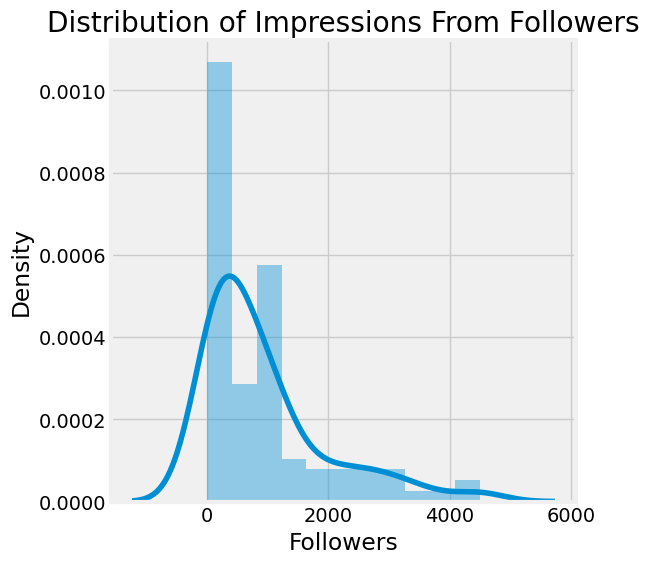

In [12]:
plt.figure(figsize=(6, 6))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(df['Followers'])
plt.show()

C:\Users\HappySoul\AppData\Local\Temp\ipykernel_21076\2676874989.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Likes'])


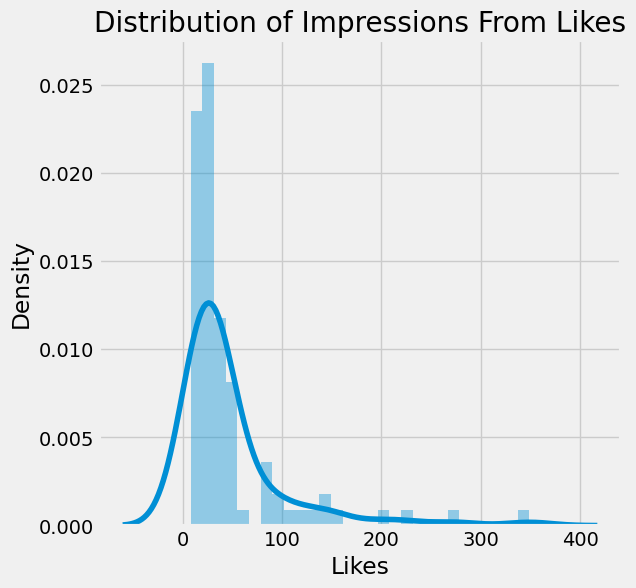

In [13]:
plt.figure(figsize=(6, 6))
plt.title("Distribution of Impressions From Likes")
sns.distplot(df['Likes'])
plt.show()

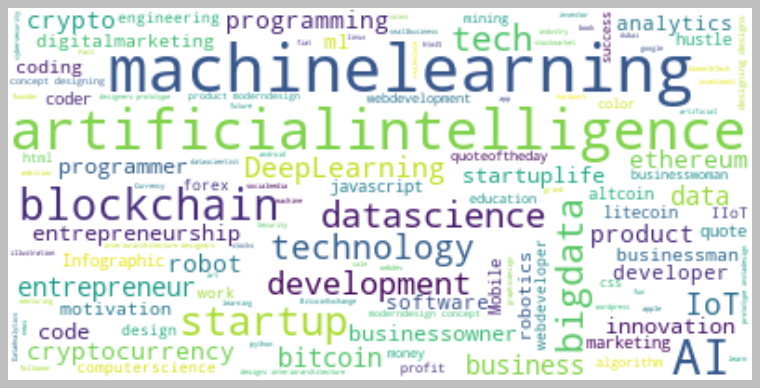

In [14]:
#hastag variables
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

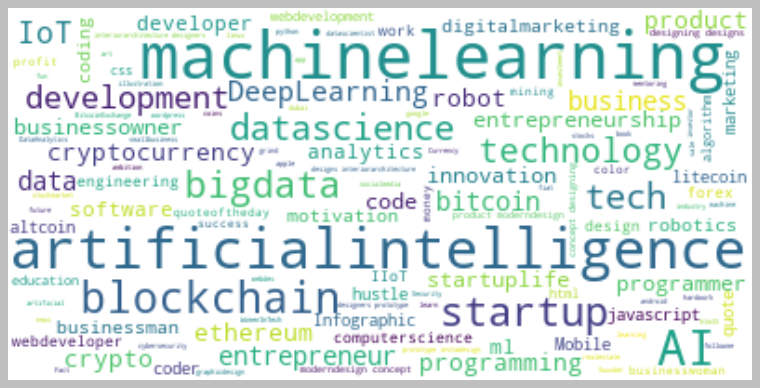

In [15]:
#hastag variables
text = " ".join(i for i in df.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

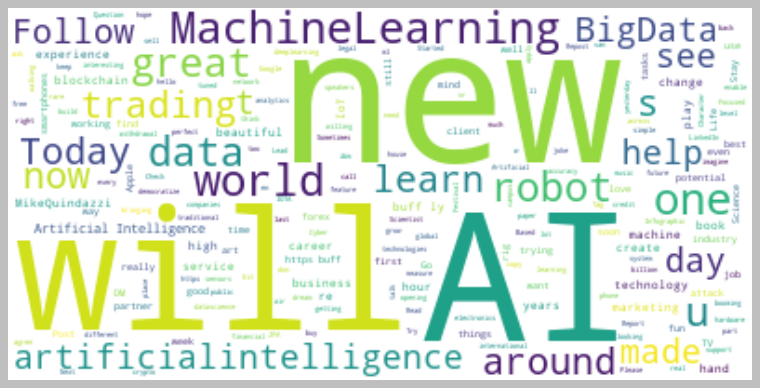

In [16]:
#caption variabes
text = " ".join(i for i in df.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Correlation 

In [17]:
correlation = df[['Followers', 'Likes']].corr()
print(correlation["Followers"].sort_values(ascending=False))

Followers    1.00000
Likes        0.27804
Name: Followers, dtype: float64


In [18]:
x = np.array(df[["Followers"]])
y = np.array(df["Likes"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.5130188981275086

In [20]:
features = np.array([[1500]])
model.predict(features)

array([80.22804401])

## Relationship between followers and likes

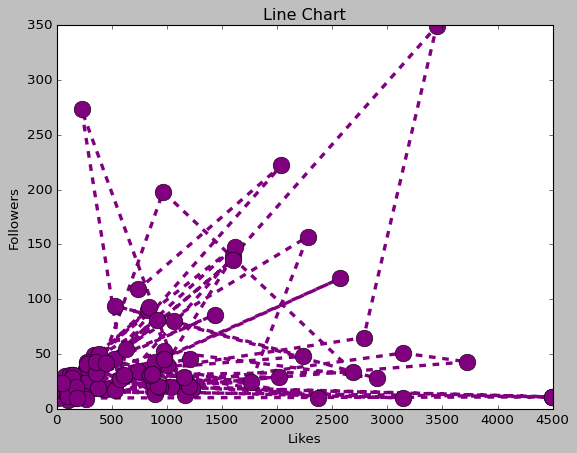

In [21]:
x = df["Followers"]
y = df["Likes"]
plt.plot(x, y, color='purple', linewidth=3, marker='o',markersize=15, linestyle='--')
plt.title("Line Chart")
plt.ylabel('Followers')
plt.xlabel('Likes')
 
plt.show()

In [22]:
# removing hours and typecasting to int
df['Time since posted'] = df['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [23]:
# Plotting Likes relationship with
# Followers and Hours since posted
def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sns.regplot(data = df, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()

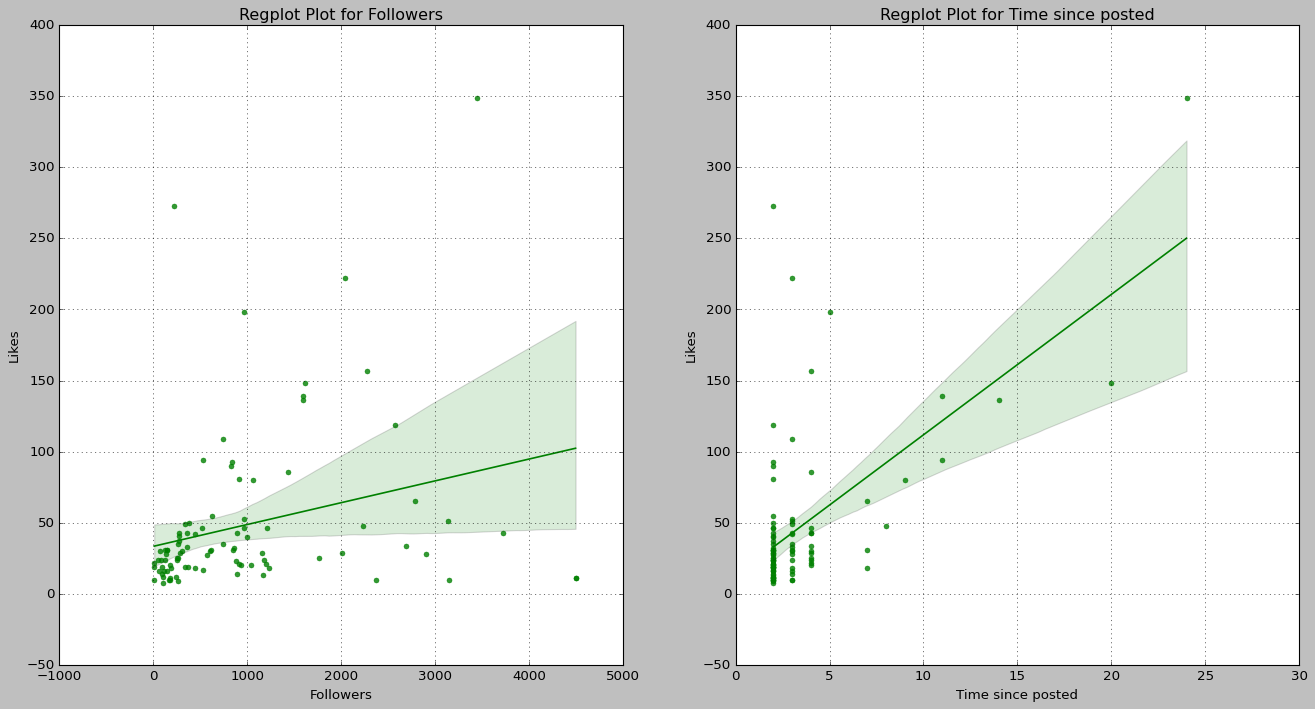

In [24]:
PlotDataGiveConclusion2(['Followers', 'Time since posted'])

In [25]:
featureVector = np.array(df[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(df['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [26]:
#diving targets by max values
targets = targets/maxValLikes

## Model Building

In [27]:
# doing standard stuff now
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [28]:
# for sake of conviniece 
# lets choose our model as 
# Gradeint Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

## Predictions

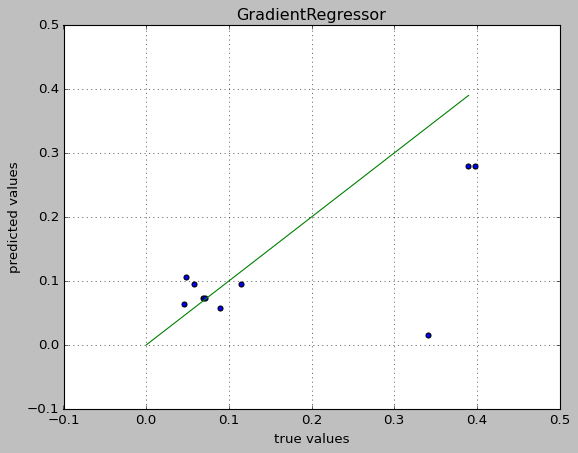

In [29]:
# doing Some Benchmarks
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

From Benchmarks this seems the model though not perfect is still workable. Lets do some Predictive modelling on the following cases:

Case 1.) You have 100 followers and time passes by one hour for 24 hours

case 2.) You have 100 followers and you Can 100 follower every hour for 24 hours

In [30]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

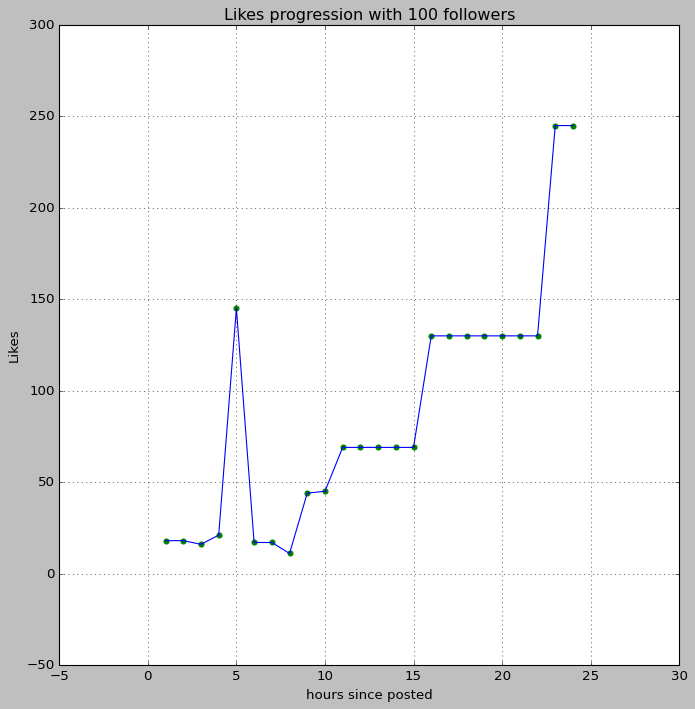

In [31]:
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

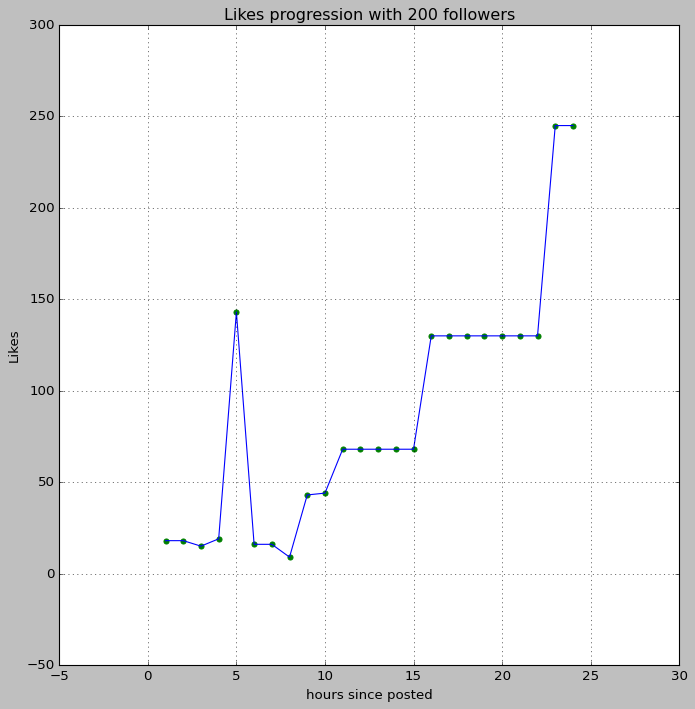

In [32]:
## let double the Number of Followers
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

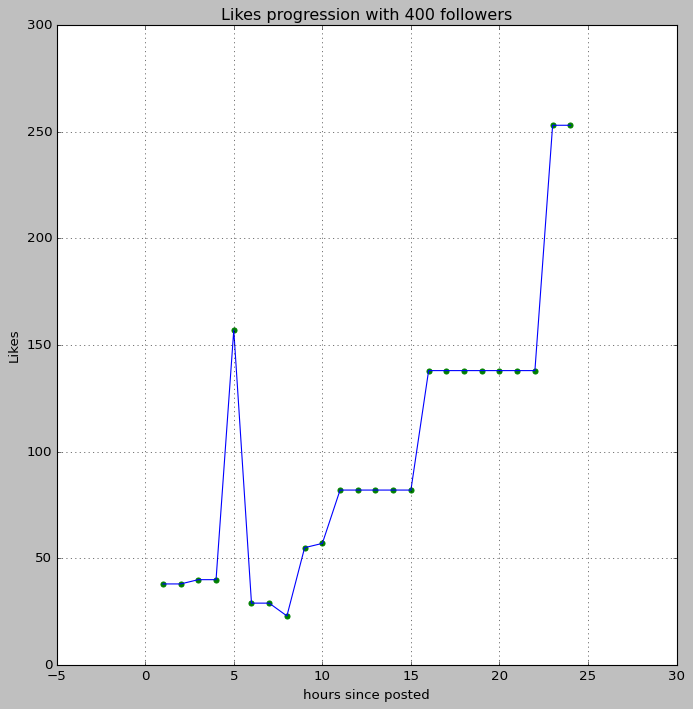

In [33]:
## let 4X the Number of Followers
PredictionsWithConstantFollowers(gbr, 400, stdSc, maxValLikes)

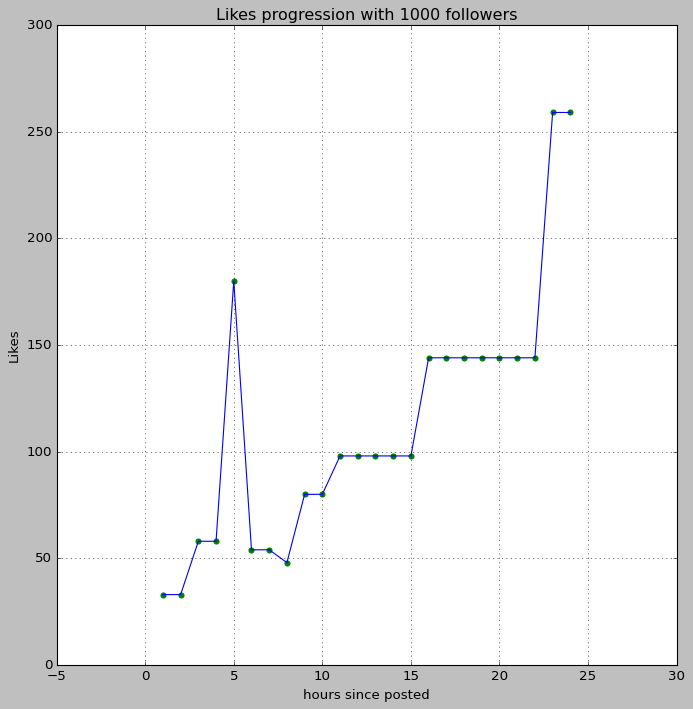

In [34]:
## let 10X the Number of Followers
PredictionsWithConstantFollowers(gbr, 1000, stdSc, maxValLikes)

According to this model we can infer one thing, that is, If you have higher number of followers your post will gain more Likes early in its life time, but maximum likes doesnt increase that much, here 20X the number followers yeild only about 20% increase in likes

In [35]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

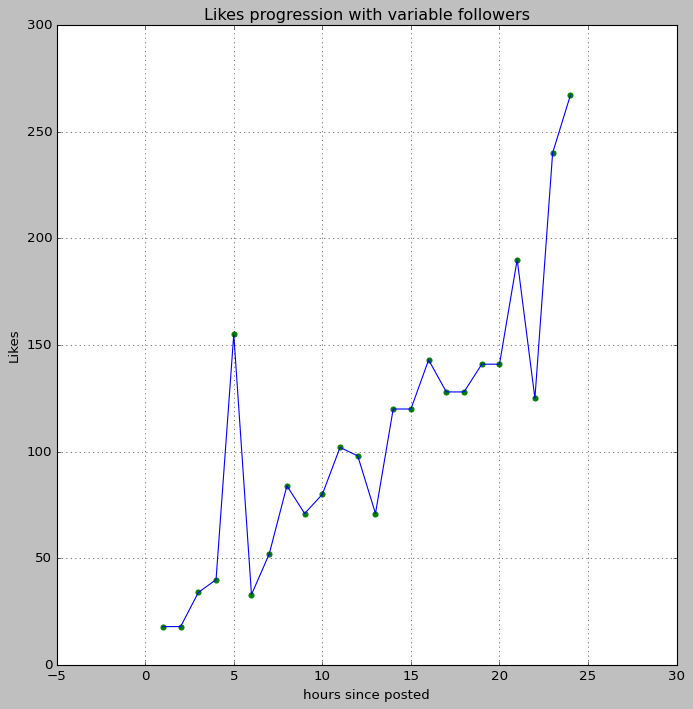

In [36]:
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValLikes)

If our predictive model is right, and case 2 is true then around 15 hours posts like will grow exponentially !! (In my opnion I dont believe so)